# Logistic Regression


## Project Setup

### Importing the Libraries 
- **LogisticRegression**: Module for implementing logistic regression, a method for binary classification

In [5]:
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module

# Essential libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Scikit-learn utilities

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Set up matplotlib for inline display
%matplotlib inline

### Importing the Data

In [6]:
import sys
import os

# To allow for importing of 'utils' module from parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from utils import import_data

dataset_path = "../data"
dataset_version = "automated-v1.0"

# Import the dataset (returns a dictionary)
automated_dataset = import_data(dataset_path, dataset_version)

# Extract the dataframe from the dictionary
df = automated_dataset['dataframe']

print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {df.columns.tolist()}")
df.head()

Dataset shape: (1400, 17)
Dataset columns: ['user_media_count', 'user_follower_count', 'user_following_count', 'user_has_highligh_reels', 'user_has_external_url', 'user_tags_count', 'follower_following_ratio', 'user_biography_length', 'username_length', 'username_digit_count', 'media_comment_numbers', 'media_comments_are_disabled', 'media_has_location_info', 'media_hashtag_numbers', 'media_like_numbers', 'mediaUpload_times', 'automated_behaviour']


,user_media_count,user_follower_count,user_following_count,user_has_highligh_reels,user_has_external_url,user_tags_count,follower_following_ratio,user_biography_length,username_length,username_digit_count,media_comment_numbers,media_comments_are_disabled,media_has_location_info,media_hashtag_numbers,media_like_numbers,mediaUpload_times,automated_behaviour
0,97,1612,7108,0,1,36,0.226787,133,12,0,"[5, 2, 10, 0, 3, 2, 2, 2, 4, 0, 0, 6, 6, 0, 2,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[10, 10, 12, 10, 13, 13, 10, 12, 10, 11, 11, 1...","[100, 78, 112, 78, 77, 111, 97, 95, 63, 83, 42...","[1540847457, 1540744841, 1538410400, 153729214...",1
1,863,3028,912,1,0,77,3.320175,99,11,0,"[3, 2, 3, 4, 7, 2, 0, 6, 2, 2, 1, 9, 2, 0, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[8, 11, 14, 17, 12, 10, 13, 14, 14, 11, 10, 11...","[229, 331, 180, 326, 313, 157, 245, 161, 182, ...","[1542664246, 1542569444, 1542564418, 154211928...",1
2,149,5213,1157,1,1,56,4.505618,120,18,0,"[12, 16, 37, 11, 3, 4, 2, 4, 5, 1, 1, 2, 3, 3,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...","[25, 25, 25, 25, 15, 15, 15, 5, 15, 10, 10, 10...","[237, 254, 350, 257, 180, 172, 141, 84, 218, 8...","[1543220394, 1542972220, 1542868998, 154278889...",1
3,33,12423,1763,0,0,2,7.046512,55,13,0,"[2, 2, 7, 14, 17, 3, 2, 5, 2, 1, 5, 5, 8, 1, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 14, 14, 0, 0...","[163, 30, 92, 111, 145, 110, 81, 81, 61, 60, 6...","[1543886933, 1543793413, 1543704343, 154344770...",1
4,1000,9496,2412,1,0,91,3.936982,33,8,0,"[4, 0, 13, 9, 9, 6, 16, 4, 25, 6, 3, 4, 16, 10...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[4, 1, 2, 3, 3, 0, 0, 1, 0, 2, 1, 2, 3, 1, 1, ...","[61, 222, 437, 829, 681, 440, 920, 256, 1017, ...","[1543939920, 1543699089, 1543187756, 154264414...",1


## 1. Data Preprocessing and Scaling

In this step, we'll preprocess the data by:
1. Identifying columns that contain lists
2. Converting list columns to numeric features
3. Scaling the numeric features for model training

In [8]:
def extract_timestamp_features(timestamps):
    # Sort timestamps
    sorted_timestamps = sorted(timestamps)
    
    # Calculate intervals between posts
    intervals = [sorted_timestamps[i+1] - sorted_timestamps[i] 
                for i in range(len(sorted_timestamps)-1)]
    
    # Key features
    features = {
        "interval_std": np.std(intervals),
    }
    
    return features

# Split into features and target
X = df.drop('automated_behaviour', axis=1)  
y = df['automated_behaviour']  

# Check for columns containing lists
list_columns = []
for col in X.columns:
    if isinstance(X[col].iloc[0], list):
        list_columns.append(col)

print(f"List columns that need preprocessing: {list_columns}")

# Process list columns to extract numeric features
X_processed = X.copy()

# Define binary and numeric columns
binary_columns = ['media_comments_are_disabled', 'media_has_location_info']
numeric_columns = ['media_comment_numbers', 'media_hashtag_numbers', 'media_like_numbers']

for col in list_columns:
    if col == 'mediaUpload_times':  # Special handling for timestamps
        # Extract timestamp features
        X_processed[f'{col}_interval_std'] = X_processed[col].apply(
            lambda x: extract_timestamp_features(x)['interval_std'] if len(x) > 1 else 0
        )
        X_processed = X_processed.drop(col, axis=1)
    elif col in binary_columns:
        # For binary features, sum up the 1s
        X_processed[col] = X_processed[col].apply(np.sum)
    elif col in numeric_columns:
        # For numeric features, take the average
        X_processed[col] = X_processed[col].apply(lambda x: np.mean(x) if len(x) > 0 else 0)

# Splitting the dataset (20% Testing, 20% Validating, 60% Training)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_processed, y,   # Changed X to X_processed here
    test_size=0.2, 
    random_state=42, 
    shuffle=True, 
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, 
    test_size=0.25, 
    random_state=42, 
    shuffle=True, 
    stratify=y_train_val
)

print(np.unique(y_train, return_counts=True))

# Apply StandardScaler to the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)    # Added validation set scaling
X_test_scaled = scaler.transform(X_test)

# Print shapes to verify
print(f"Processed features shape: {X_processed.shape}")
print(f"Training features shape: {X_train.shape}")
print(f"Validation features shape: {X_val.shape}")    # Added validation shape
print(f"Testing features shape: {X_test.shape}")
print(f"Scaled training data shape: {X_train_scaled.shape}")

List columns that need preprocessing: ['media_comment_numbers', 'media_comments_are_disabled', 'media_has_location_info', 'media_hashtag_numbers', 'media_like_numbers', 'mediaUpload_times']
(array([0, 1]), array([420, 420]))
Processed features shape: (1400, 16)
Training features shape: (840, 16)
Validation features shape: (280, 16)
Testing features shape: (280, 16)
Scaled training data shape: (840, 16)


## Data Exploration and Unsupervised Analysis

Exploring the dataset using unsupervised learning techniques and visualizations:
1. Analyze feature distributions and relationships with the target
2. Create correlation matrix of features
3. Apply PCA for dimensionality reduction
4. Use clustering to identify natural groupings in the data

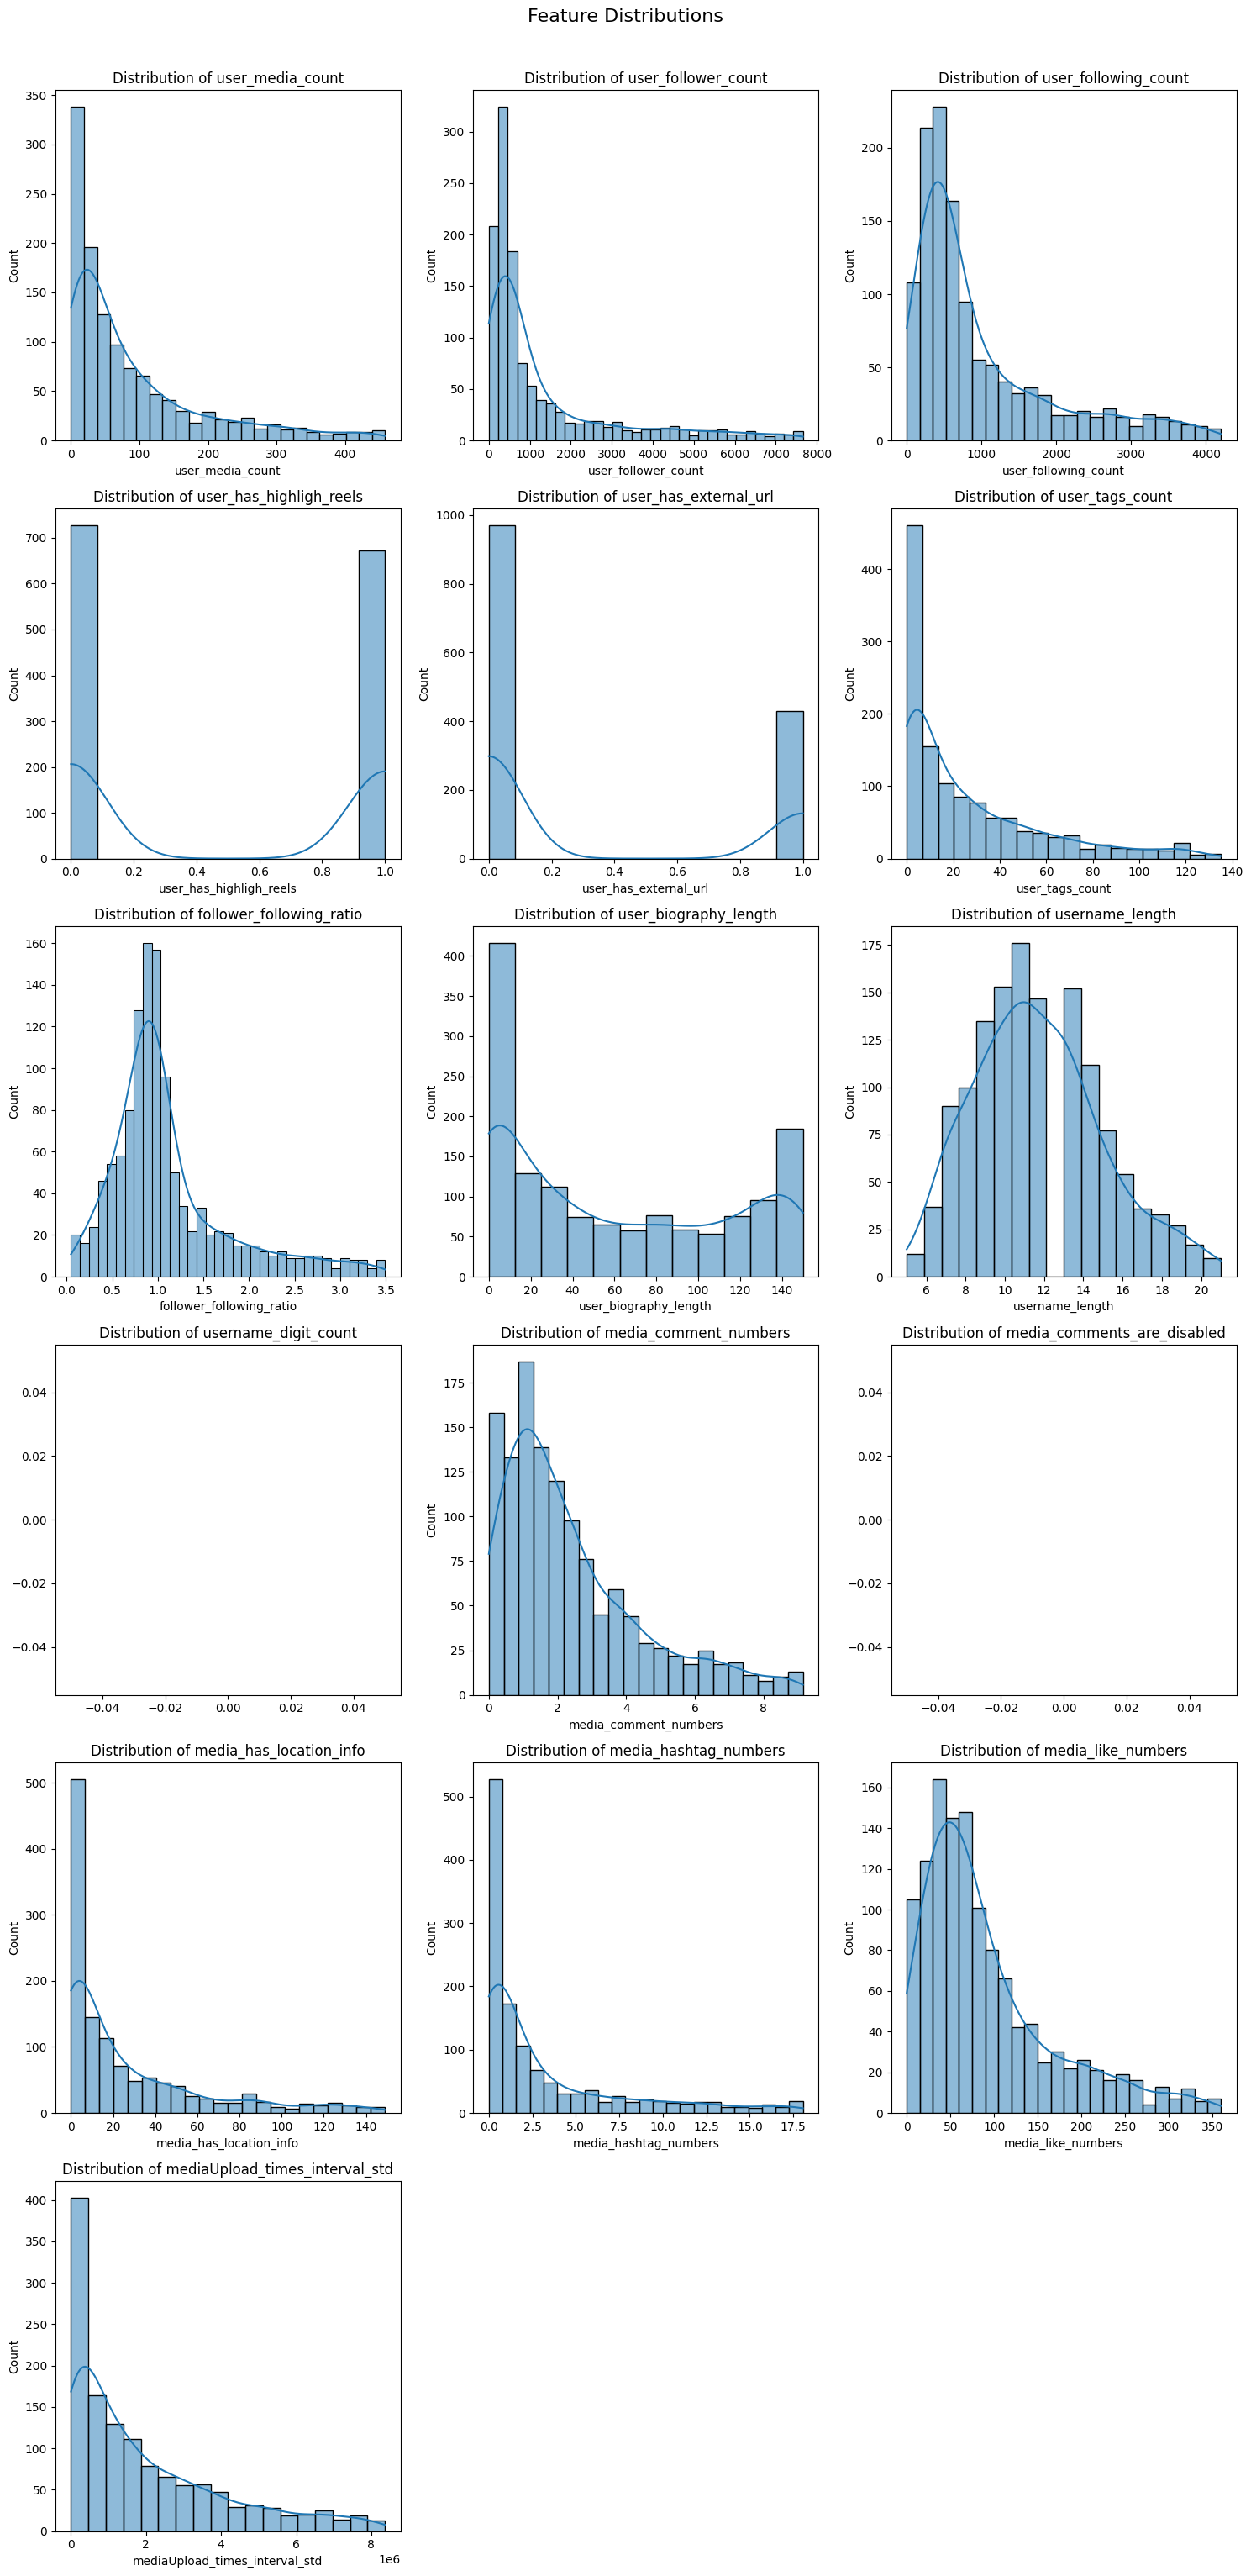

C:\Users\suisc\AppData\Local\Temp\ipykernel_8864\1385116936.py:38: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, upper_limit)
C:\Users\suisc\AppData\Local\Temp\ipykernel_8864\1385116936.py:38: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, upper_limit)


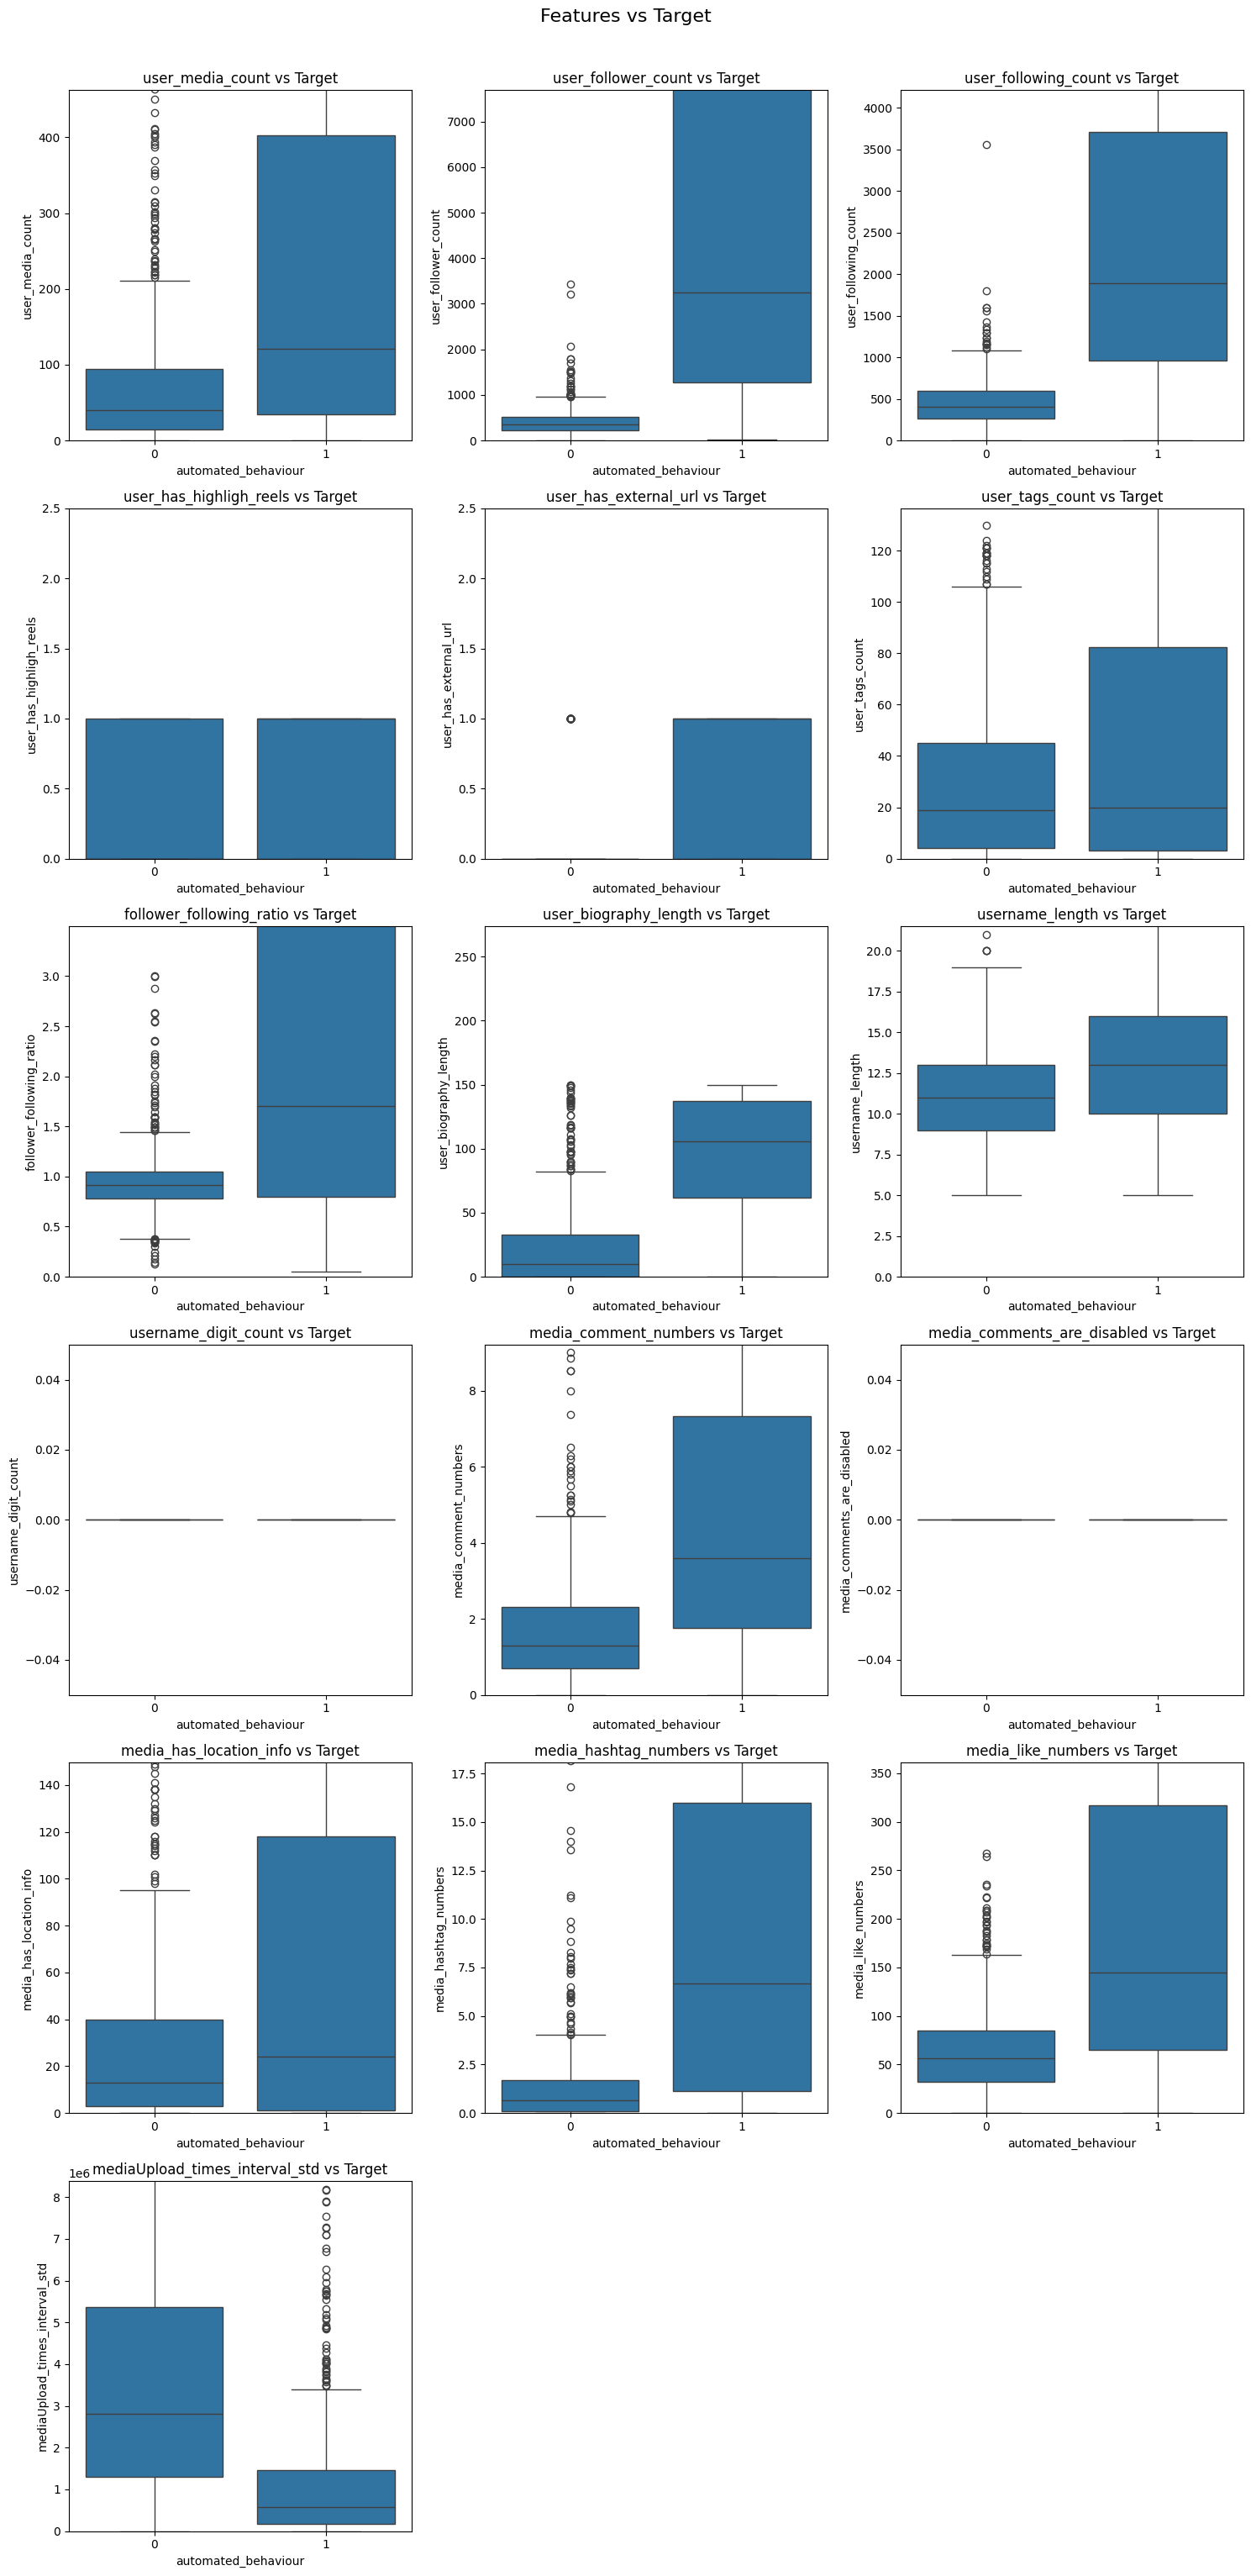

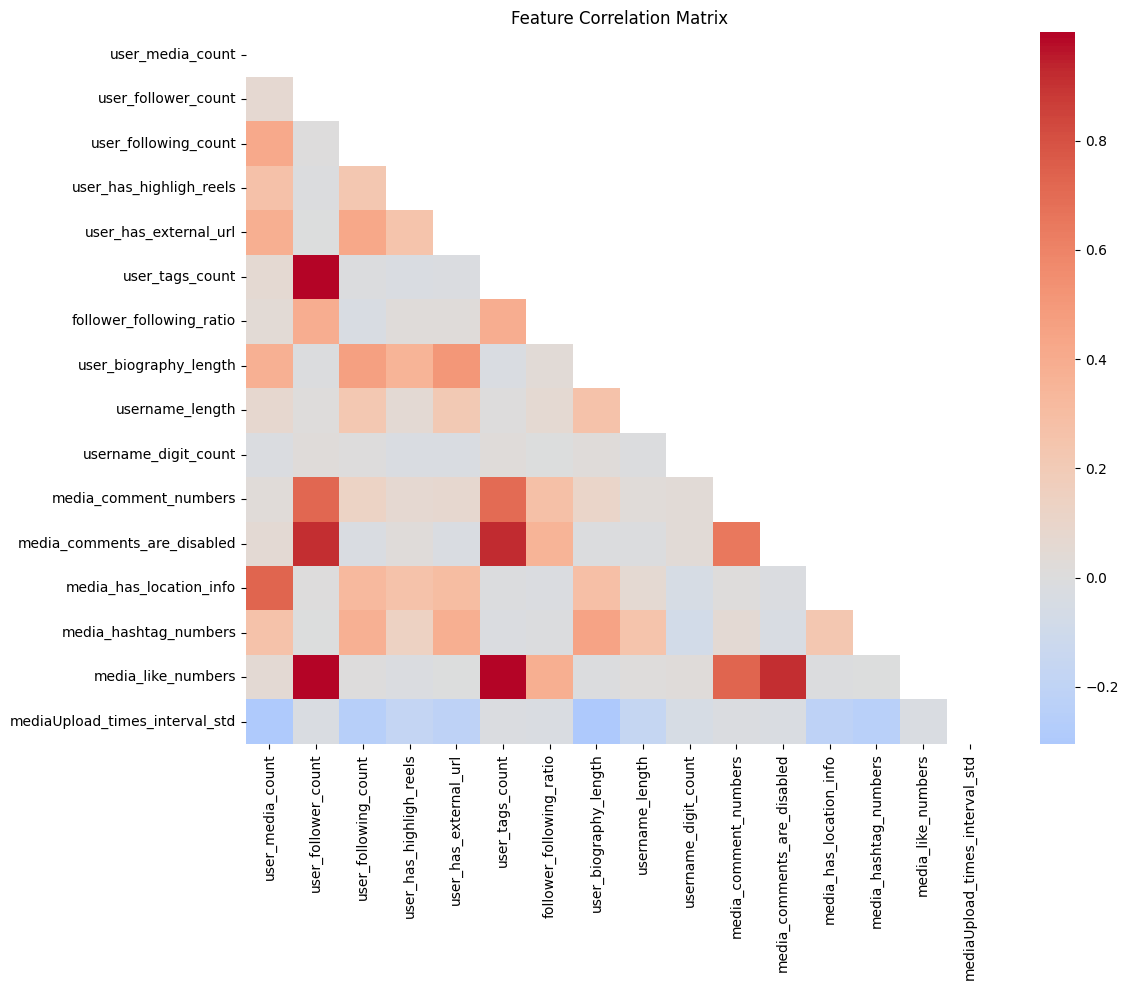

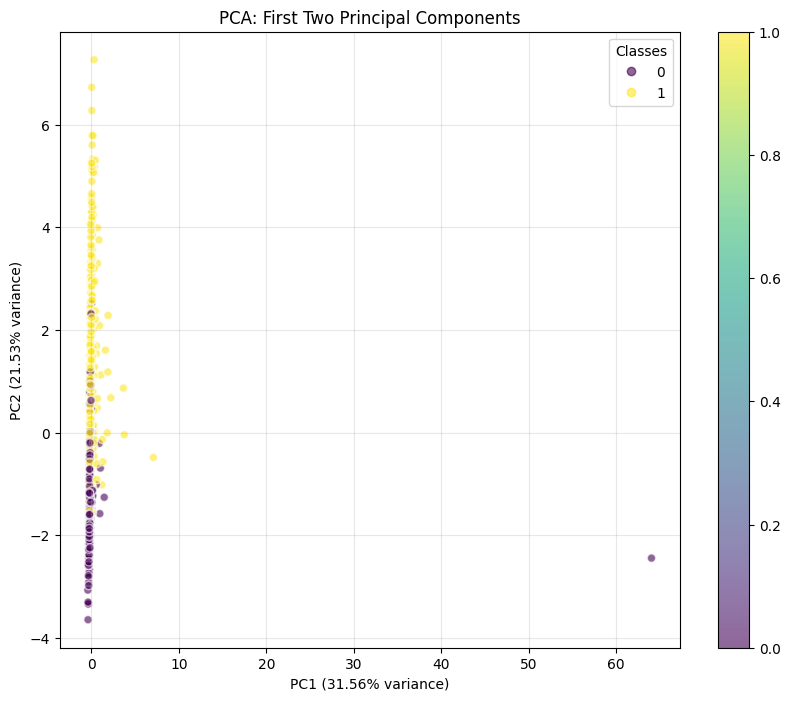

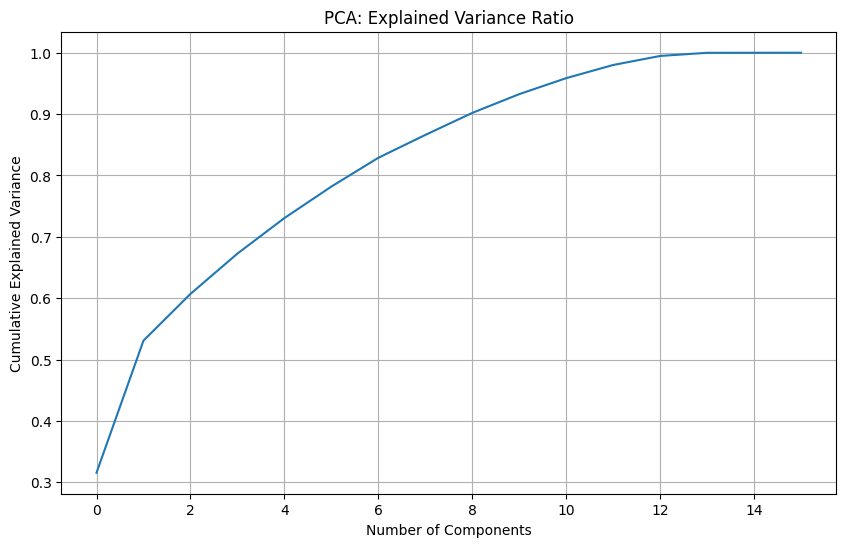

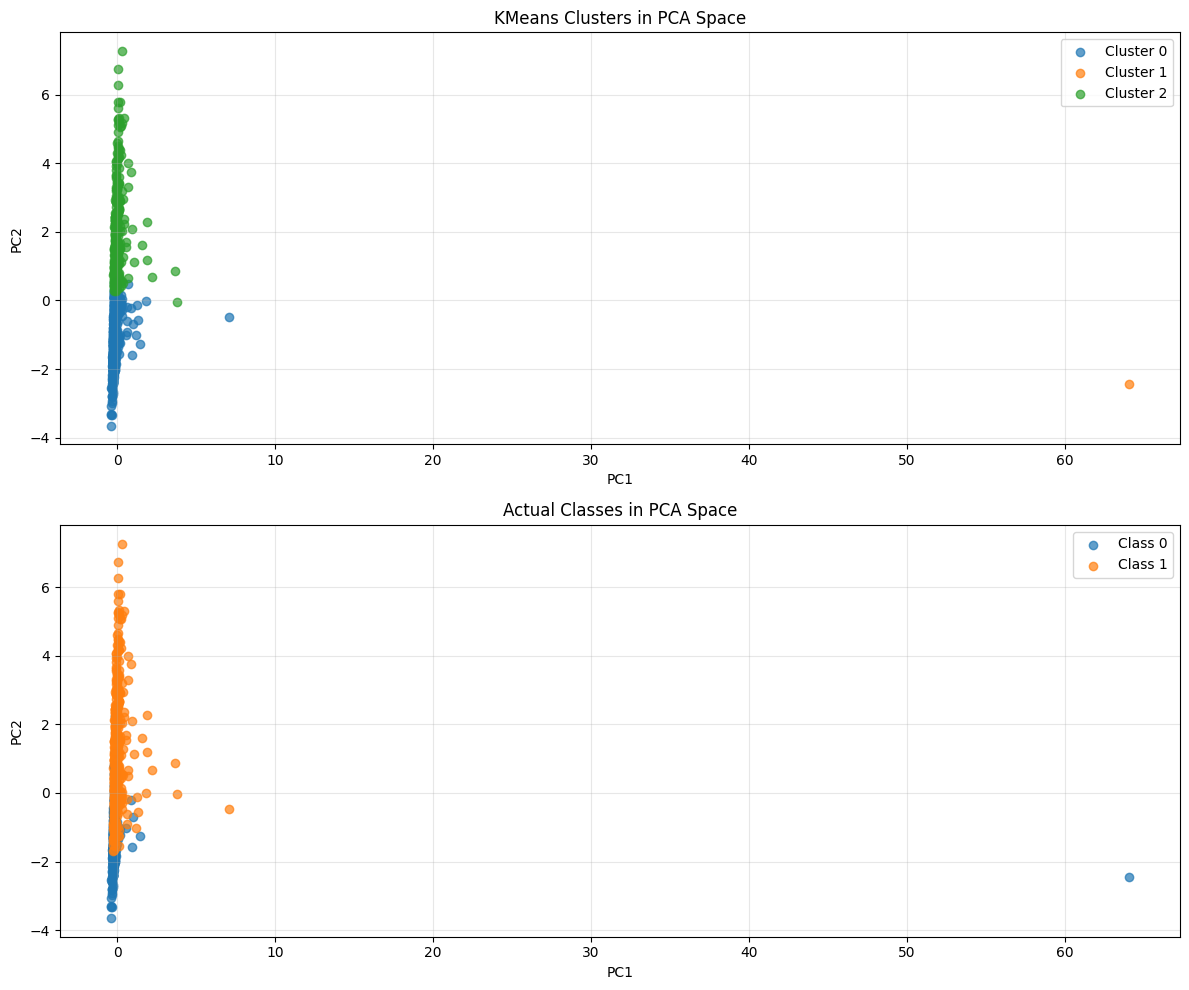

<Figure size 1000x600 with 0 Axes>

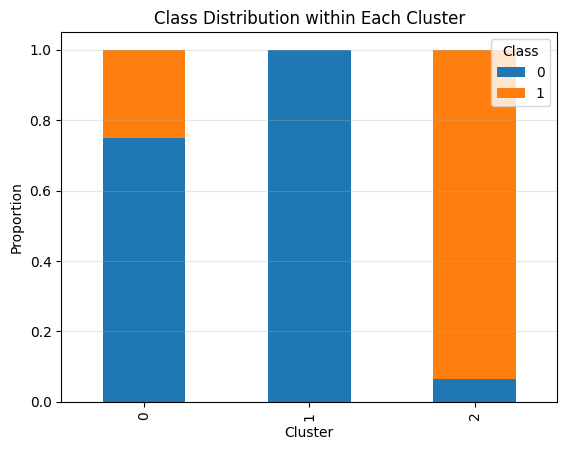


Data Exploration Insights:
- Total features: 16
- PCA shows that 7 components explain 80% of variance
- Top correlating features:
  user_follower_count and media_like_numbers: 0.998
  media_like_numbers and user_follower_count: 0.998
  user_tags_count and user_follower_count: 0.998
  user_follower_count and user_tags_count: 0.998
  media_like_numbers and user_tags_count: 0.998


In [9]:
X_numerical = X_processed.copy()

# 1. Visualize all feature distributions
n_features = len(X_numerical.columns)
n_rows = (n_features + 2) // 3  # Calculate needed rows (ceiling division by 3)

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(X_numerical.columns):
    plt.subplot(n_rows, 3, i+1)
    
    # Get the data for this feature
    data = X_numerical[col]
    
    # Calculate reasonable limits (removing extreme outliers)
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    
    # Create histogram with adjusted axis
    sns.histplot(data[data < upper_limit], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.suptitle('Feature Distributions', y=1.02, fontsize=16)
plt.show()

# 2. Visualize relationship between all features and target
plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(X_numerical.columns):
    plt.subplot(n_rows, 3, i+1)
    
    # Calculate reasonable y-axis limits
    q1, q3 = np.percentile(X_numerical[col], [25, 75])
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    
    # Create boxplot with adjusted y-axis
    sns.boxplot(x=y, y=X_numerical[col])
    plt.ylim(0, upper_limit)
    plt.title(f'{col} vs Target')
    plt.tight_layout()
plt.suptitle('Features vs Target', y=1.02, fontsize=16)
plt.show()

# 3. Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = X_numerical.corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=False, mask=mask, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# 4. PCA analysis
# Standardize data for PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Visualize PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6, edgecolors='w')
plt.title('PCA: First Two Principal Components')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.colorbar(scatter)
plt.grid(alpha=0.3)
plt.show()

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
pca_full = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance Ratio')
plt.grid(True)
plt.show()

# 5. Clustering analysis - use a fixed number of clusters (3) without silhouette scoring
k = 3  # Using 3 clusters as a simple example
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_train_scaled)

# Visualize clusters in PCA space
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
for i in range(k):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], 
                label=f'Cluster {i}', alpha=0.7)
plt.title('KMeans Clusters in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(alpha=0.3)

# Compare clusters with actual classes
plt.subplot(2, 1, 2)
for i in np.unique(y_train):
    plt.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1], 
                label=f'Class {i}', alpha=0.7)
plt.title('Actual Classes in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Analyze cluster vs. class distribution
cluster_class_df = pd.DataFrame({'Cluster': cluster_labels, 'Class': y_train})
cluster_class_counts = pd.crosstab(cluster_class_df['Cluster'], 
                                   cluster_class_df['Class'], 
                                   normalize='index')

plt.figure(figsize=(10, 6))
cluster_class_counts.plot(kind='bar', stacked=True)
plt.title('Class Distribution within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Class')
plt.grid(axis='y', alpha=0.3)
plt.show()

# 7. Summarize findings
print("\nData Exploration Insights:")
print(f"- Total features: {X_numerical.shape[1]}")
print(f"- PCA shows that {np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= 0.8) + 1} components explain 80% of variance")
print("- Top correlating features:")
top_correlations = correlation_matrix.unstack().sort_values(ascending=False)
top_correlations = top_correlations[top_correlations < 1].head(5)
for pair, corr in top_correlations.items():
    print(f"  {pair[0]} and {pair[1]}: {corr:.3f}")

## Drop the irrelevant data features

In [ ]:
columns_to_drop = ['media_comments_are_disabled', 'username_digit_count']
X_processed = X_processed.drop(columns=columns_to_drop)

## 2. Logistic Regression with Gradient Ascent

Implementing logistic regression with gradient ascent:
1. Initialize model parameters
2. Implement sigmoid function and log-likelihood calculation
3. Use gradient ascent to find optimal weights
4. Track learning progress with log-likelihood

In [65]:
class LogisticRegressionGradientAscent:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.log_likelihoods = []
    
    def sigmoid(self, z):
        """Sigmoid activation function with clipping to prevent overflow"""
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))
    
    def initialize_parameters(self, n_features):
        """Initialize weights and bias"""
        self.weights = np.zeros(n_features)
        self.bias = 0
    
    def compute_log_likelihood(self, X, y):
        """Compute log likelihood (to be maximized)"""
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        
        # Add small epsilon to avoid log(0)
        epsilon = 1e-15
        predictions = np.clip(predictions, epsilon, 1 - epsilon)
        
        # Calculate log likelihood (negative of log loss)
        log_likelihood = np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        return log_likelihood
    
    def compute_gradients(self, X, y):
        """Compute gradients for gradient ascent"""
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        
        # Calculate gradients
        error = y - predictions
        dw = np.dot(X.T, error) / len(y)
        db = np.sum(error) / len(y)
        
        return dw, db
    
    def fit(self, X, y):
        """Train the model using gradient ascent"""
        # Convert to numpy arrays
        X = np.asarray(X)
        y = np.asarray(y).flatten()
        
        # Initialize parameters
        m, n = X.shape
        self.initialize_parameters(n)
        
        # Store iterations for progress tracking
        iterations_to_log = []
        
        # Training loop
        for i in range(self.num_iterations):
            # Compute gradients
            dw, db = self.compute_gradients(X, y)
            
            # Update parameters (gradient ascent)
            self.weights += self.learning_rate * dw
            self.bias += self.learning_rate * db
            
            # Compute log likelihood
            if i % 100 == 0:
                log_likelihood = self.compute_log_likelihood(X, y)
                self.log_likelihoods.append(log_likelihood)
                print(f"Iteration {i}, Log-Likelihood: {log_likelihood:.6f}")
                iterations_to_log.append({
                    'Iteration': i,
                    'Log-Likelihood': log_likelihood
                })
        
        # Final log likelihood
        final_log_likelihood = self.compute_log_likelihood(X, y)
        self.log_likelihoods.append(final_log_likelihood)
        print(f"Final Log-Likelihood: {final_log_likelihood:.6f}")
        
        return self
    
    def predict_proba(self, X):
        """Predict probability of class 1"""
        X = np.asarray(X)
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    
    def predict(self, X):
        """Predict class labels"""
        return (self.predict_proba(X) >= 0.5).astype(int)
    
    def evaluate(self, X, y):
        """Calculate accuracy"""
        y = np.asarray(y).flatten()
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

## 3. Model Training and Evaluation

Training the logistic regression model and evaluating performance:
1. Train the model on processed data
2. Evaluate on training and test sets
3. Visualize learning progress

Iteration 0, Log-Likelihood: -768.046815
Iteration 100, Log-Likelihood: -470.713036
Iteration 200, Log-Likelihood: -396.082021
Iteration 300, Log-Likelihood: -358.887121
Iteration 400, Log-Likelihood: -335.971371
Iteration 500, Log-Likelihood: -320.260855
Iteration 600, Log-Likelihood: -308.748040
Iteration 700, Log-Likelihood: -299.904828
Iteration 800, Log-Likelihood: -292.865645
Iteration 900, Log-Likelihood: -287.102763
Final Log-Likelihood: -282.320887
Training accuracy: 0.9089
Testing accuracy: 0.8857


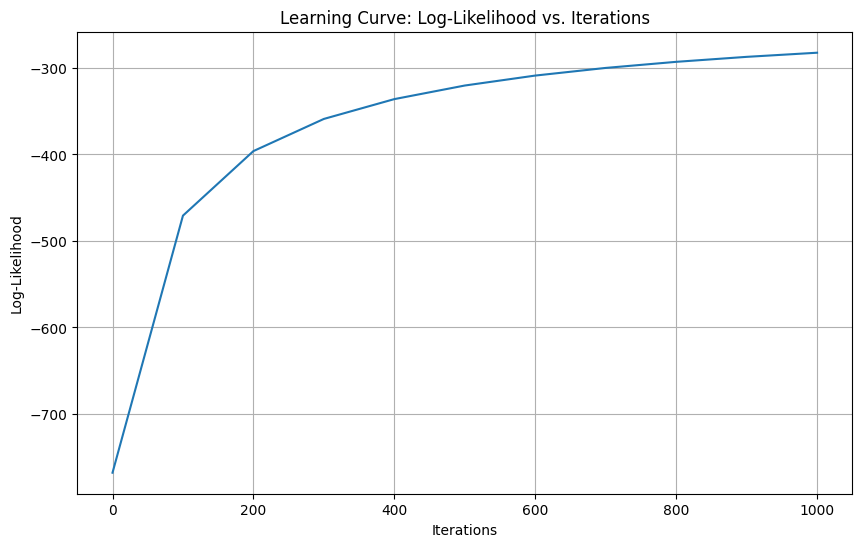

In [70]:
# Train the logistic regression model
model = LogisticRegressionGradientAscent(learning_rate=0.01, num_iterations=1000)
model.fit(X_train_scaled, y_train)

# Evaluate the model
train_accuracy = model.evaluate(X_train_scaled, y_train)
test_accuracy = model.evaluate(X_test_scaled, y_test)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Testing accuracy: {test_accuracy:.4f}")

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(0, len(model.log_likelihoods) * 100, 100), model.log_likelihoods)
plt.title('Learning Curve: Log-Likelihood vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.grid(True)
plt.show()